In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('balanced_dataset_50_50.csv')

In [3]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,TRANSFER,129526.58,C1786736565,0.00,0.00,C1189777296,2103690.88,2233217.46,0.0
1,CASH_IN,304210.97,C2138211913,6638620.67,6942831.64,C1766776273,513871.60,209660.63,0.0
2,CASH_OUT,57905.63,C393598530,188.00,0.00,C769319919,611506.02,669411.65,0.0
3,CASH_IN,83102.70,C807731926,2274365.81,2357468.51,C322340400,122204.31,39101.61,0.0
4,PAYMENT,14341.19,C603392505,459181.00,444839.81,M1570710058,0.00,0.00,0.0


In [4]:
df.tail()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
5065,CASH_OUT,82869.09,C1143635966,82869.09,0.0,C275663782,104258.05,187127.14,1.0
5066,TRANSFER,9960382.40,C427148786,9960382.40,0.0,C1532977706,0.00,0.00,1.0
5067,CASH_OUT,9960382.40,C1041938819,9960382.40,0.0,C1108421533,95048.58,10055430.98,1.0
5068,TRANSFER,1231309.64,C2120061745,1231309.64,0.0,C287066549,0.00,0.00,1.0
5069,CASH_OUT,1231309.64,C488263608,1231309.64,0.0,C168611895,27650.97,1258960.61,1.0


In [5]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,5.070000e+03,5.070000e+03,5.070000e+03,5.070000e+03,5.070000e+03,5070.000000
mean,7.305437e+05,1.087883e+06,4.523101e+05,7.786253e+05,1.165501e+06,0.500000
std,1.605670e+06,2.672994e+06,2.136752e+06,2.252226e+06,2.612199e+06,0.500049
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.361776e+04,1.011947e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,1.677155e+05,1.133390e+05,0.000000e+00,0.000000e+00,1.438789e+05,0.500000
75%,5.223438e+05,7.980074e+05,0.000000e+00,5.533556e+05,1.152234e+06,1.000000
max,1.000000e+07,3.767004e+07,3.636535e+07,3.296166e+07,3.464570e+07,1.000000


In [6]:
df.shape

(5070, 9)

In [7]:
df.columns.values

array(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype=object)

In [8]:
df.dtypes

,0
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,float64


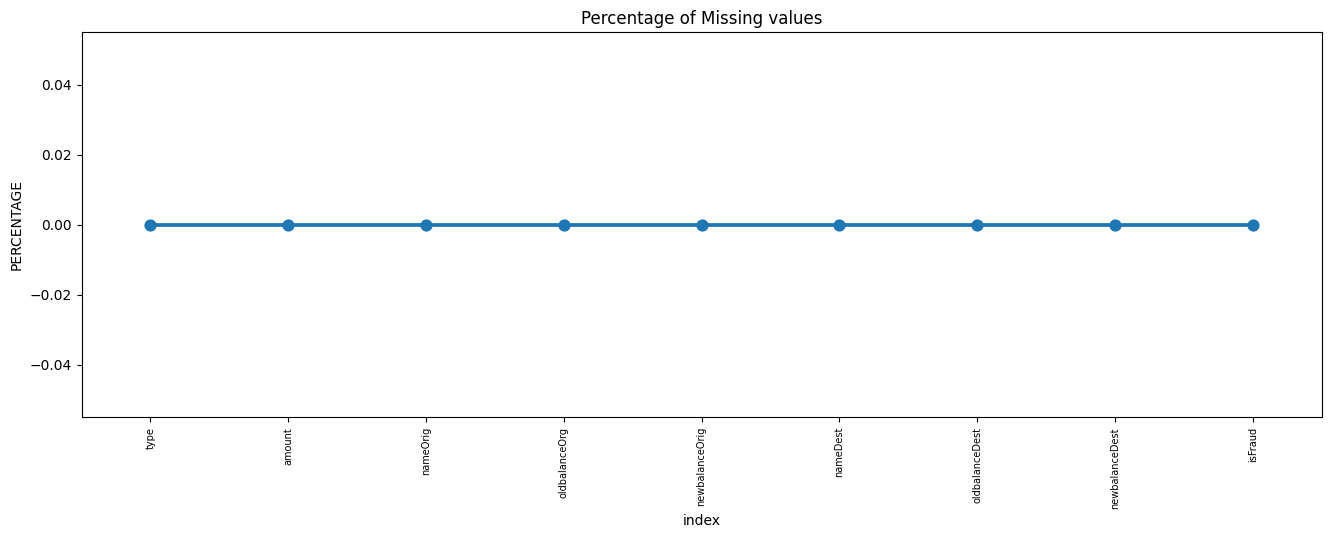

In [9]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Text(0.5, 1.02, 'Count of TARGET Variable per category')

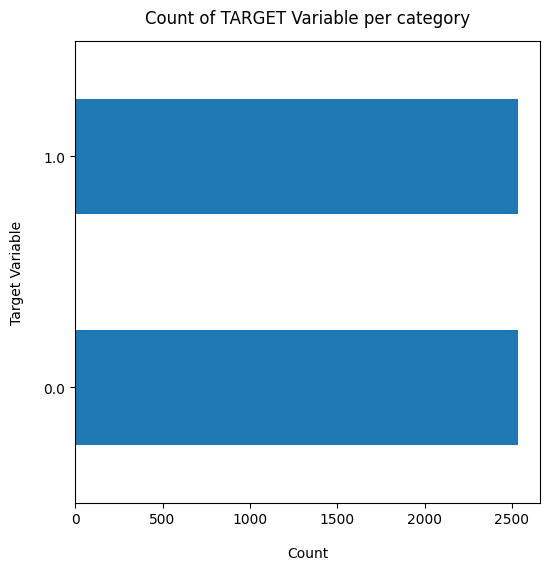

In [10]:
df['isFraud'].value_counts().plot(kind='barh', figsize=(6, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

Univariate Analysis

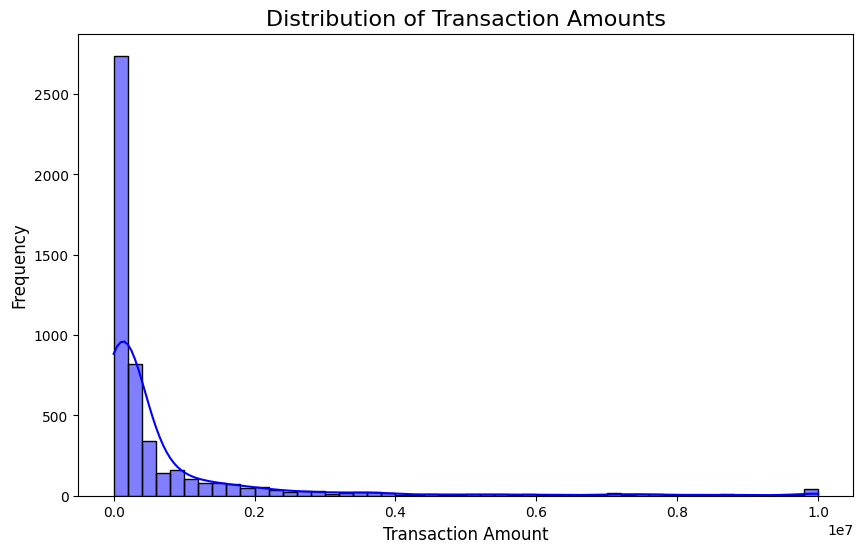

In [11]:
#finding the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [12]:
#log transformation
df['log_amount'] = np.log1p(df['amount'])

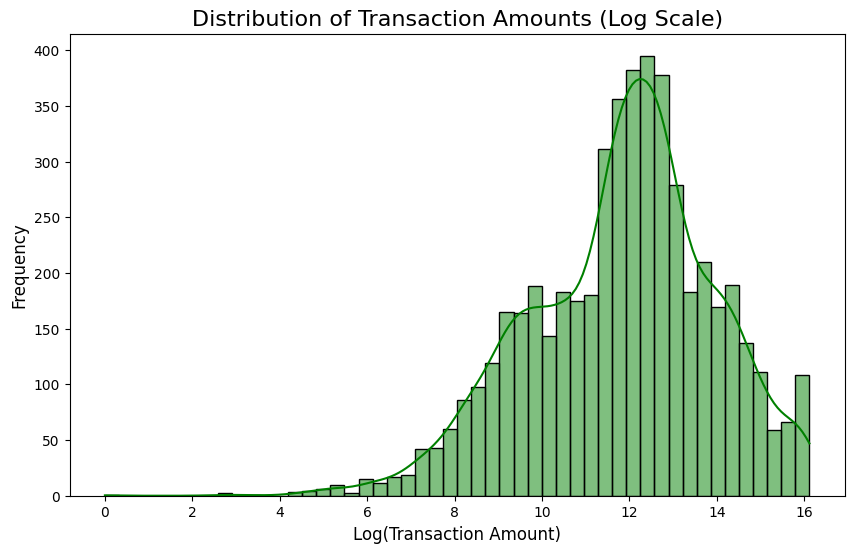

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['log_amount'], bins=50, kde=True, color='green')
plt.title('Distribution of Transaction Amounts (Log Scale)', fontsize=16)
plt.xlabel('Log(Transaction Amount)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Outlier detection

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


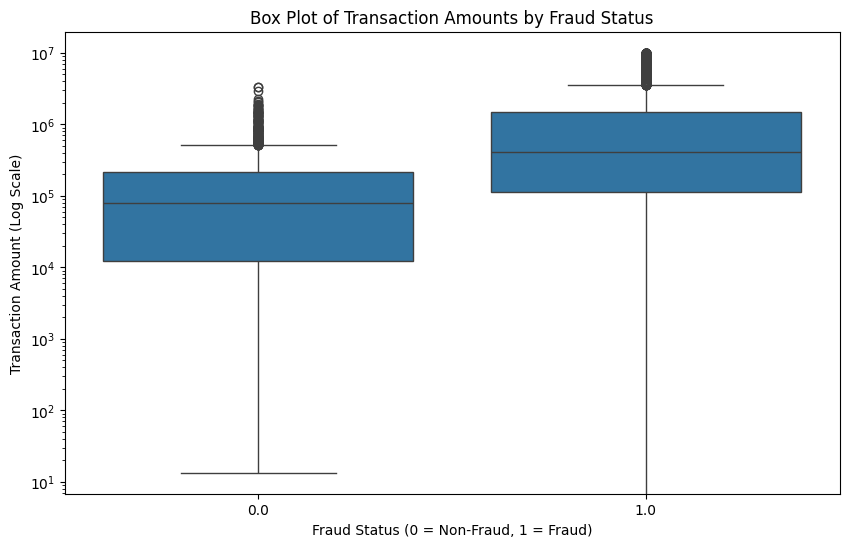

In [14]:
# Create a box plot to detect outliers based on fraud status
plt.figure(figsize=(10,6))
sns.boxplot(x='isFraud', y='amount', data=df, showfliers=True)
plt.yscale('log')  # Apply log scale to better visualize high transaction amounts
plt.title('Box Plot of Transaction Amounts by Fraud Status')
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount (Log Scale)')
plt.show()

Fraudulent transactions tend to have higher transaction amounts than non-fraudulent transactions.The distribution of transaction amounts for non-fraud transactions is more concentrated around the median than the distribution of transaction amounts for fraud transactions.

Correlation Analysis

In [15]:
correlation = df[['amount', 'isFraud']].corr()

print("Correlation between Transaction Amount and Fraud Status:")
print(correlation)

Correlation between Transaction Amount and Fraud Status:
           amount   isFraud
amount   1.000000  0.353824
isFraud  0.353824  1.000000


Moderate correlation between amount and frauduelnt transaction

In [16]:
# Summary statistics for fraudulent and non-fraudulent transactions
fraud_stats = df[df['isFraud'] == 1]['amount'].describe()
non_fraud_stats = df[df['isFraud'] == 0]['amount'].describe()

print("Summary Statistics for Fraudulent Transactions:")
print(fraud_stats)

print("\nSummary Statistics for Non-Fraudulent Transactions:")
print(non_fraud_stats)

Summary Statistics for Fraudulent Transactions:
count    2.535000e+03
mean     1.298612e+06
std      2.107653e+06
min      0.000000e+00
25%      1.141781e+05
50%      4.125113e+05
75%      1.469302e+06
max      1.000000e+07
Name: amount, dtype: float64

Summary Statistics for Non-Fraudulent Transactions:
count    2.535000e+03
mean     1.624759e+05
std      2.636493e+05
min      1.339000e+01
25%      1.231249e+04
50%      7.985929e+04
75%      2.137015e+05
max      3.344136e+06
Name: amount, dtype: float64


Fraudulent transactions are generally characterized by larger transaction amounts compared to non-fraudulent transactions.

<ipython-input-17-c316b7b7b898>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data=df, palette='PuBu')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-li

Text(0, 0.5, 'Number of transactions')

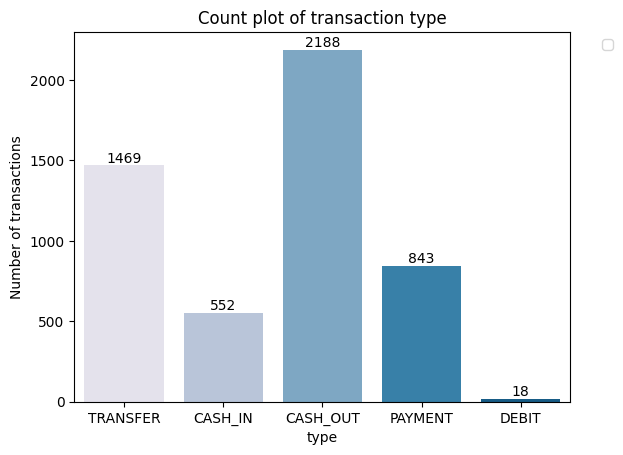

In [17]:
ax = sns.countplot(x='type', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


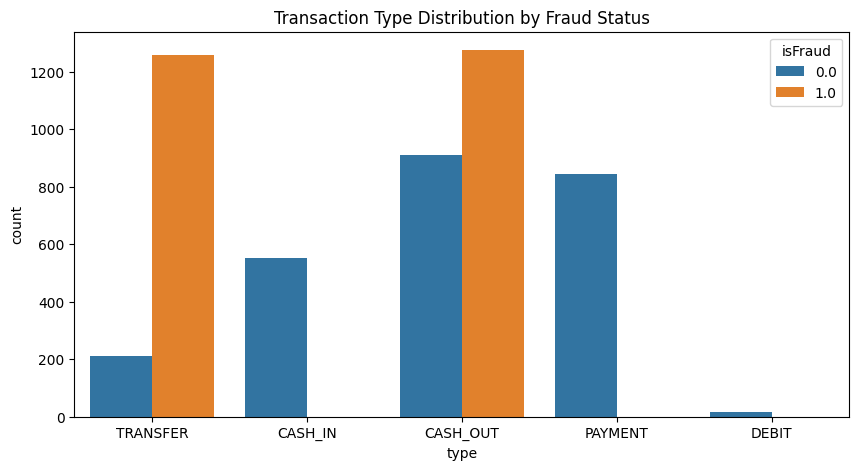

In [18]:
transaction_counts = df['type'].value_counts()

# Fraud count for each type
fraud_by_type = df[df['isFraud'] == 1]['type'].value_counts()

# Plotting the distributions
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='type', hue='isFraud')
plt.title('Transaction Type Distribution by Fraud Status')
plt.show()

The graph suggests that fraudulent transactions are more likely to be of type TRANSFER or CASH_OUT than other transaction types.

In [19]:
total_transactions_by_type = df['type'].value_counts()

# Fraudulent transactions per type
fraud_transactions_by_type = df[df['isFraud'] == 1]['type'].value_counts()

# Fraud rate calculation (fraudulent transactions / total transactions)
fraud_rate_by_type = fraud_transactions_by_type / total_transactions_by_type

# Convert to percentage
fraud_rate_by_type = fraud_rate_by_type * 100

# Display fraud rate for each type
print(fraud_rate_by_type)

type
CASH_IN           NaN
CASH_OUT    58.318099
DEBIT             NaN
PAYMENT           NaN
TRANSFER    85.704561
Name: count, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


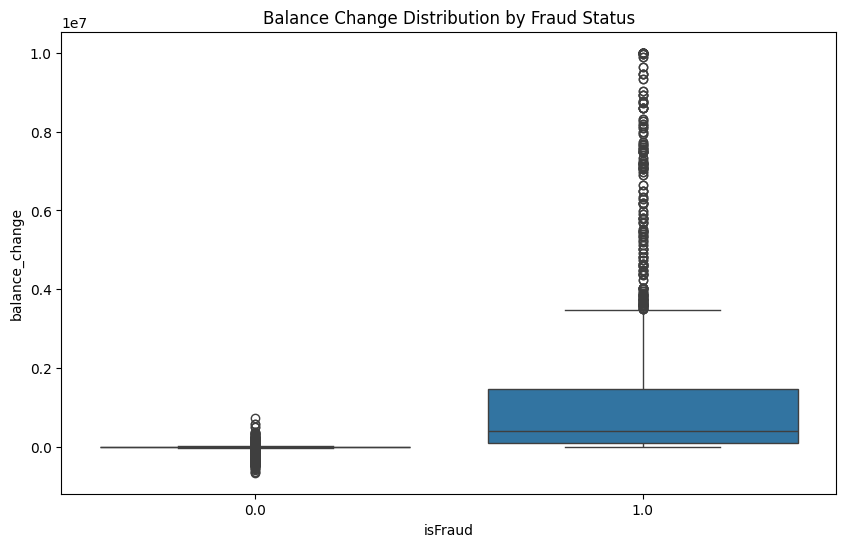

In [20]:
df['balance_change'] = df['oldbalanceOrg'] - df['newbalanceOrig']

# Check for fraudulent transactions with significant balance change
plt.figure(figsize=(10,6))
sns.boxplot(x='isFraud', y='balance_change', data=df)
plt.title('Balance Change Distribution by Fraud Status')
plt.show()

The analysis indicates a strong correlation between larger balance changes and fraudulent transactions.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


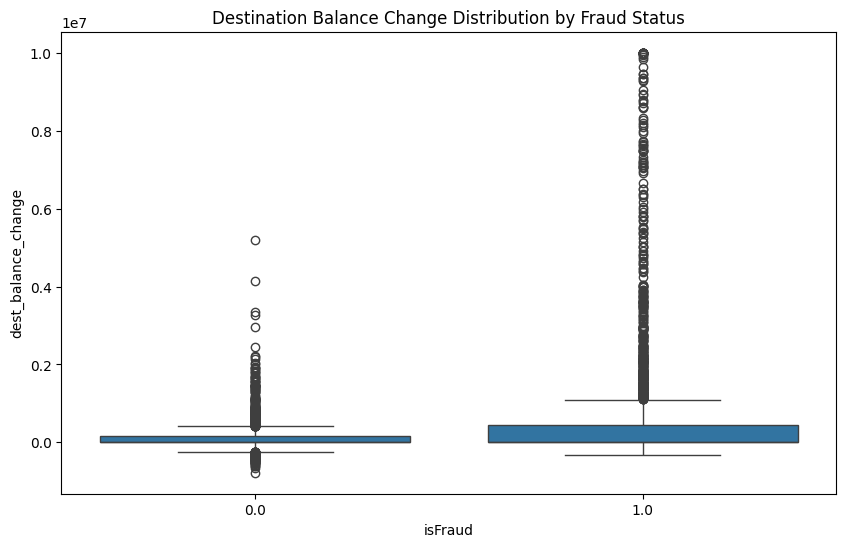

In [21]:
# Create a new column for destination balance change
df['dest_balance_change'] = df['newbalanceDest'] - df['oldbalanceDest']

# Check for fraudulent transactions with significant destination balance change
plt.figure(figsize=(10,6))
sns.boxplot(x='isFraud', y='dest_balance_change', data=df)
plt.title('Destination Balance Change Distribution by Fraud Status')
plt.show()

* The presence of numerous outliers in the fraudulent group suggests that these transactions often include very high value transfers, which can be a strong indicator of fraud.
* The analysis suggests a strong correlation between higher destination balance changes and fraudulent transactions.

In [23]:
fraud_rate_by_dest = df.groupby('nameDest')['isFraud'].mean()

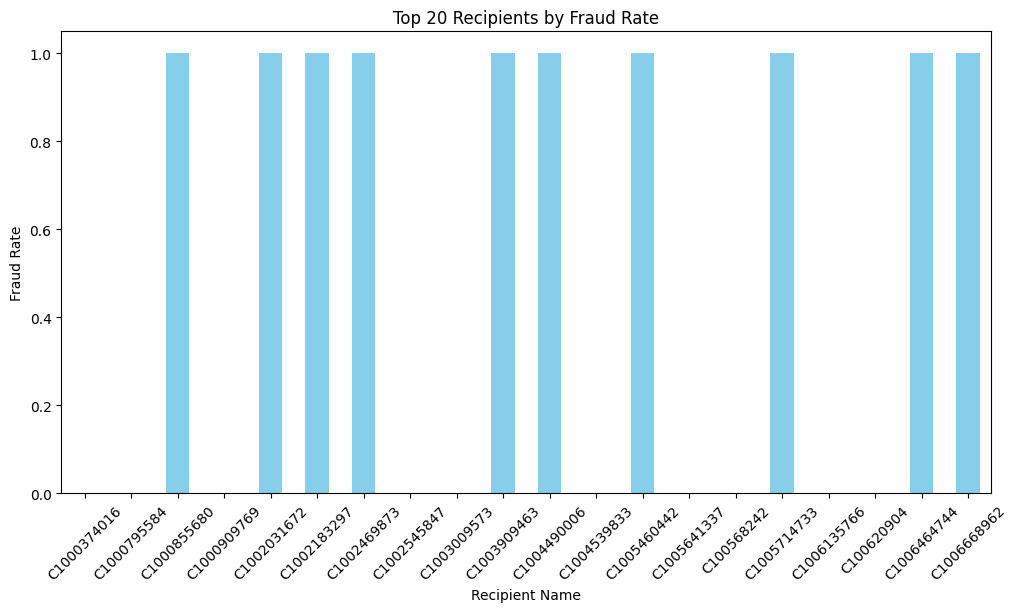

In [25]:
plt.figure(figsize=(12, 6))
fraud_rate_by_dest.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Recipients by Fraud Rate')
plt.xlabel('Recipient Name')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

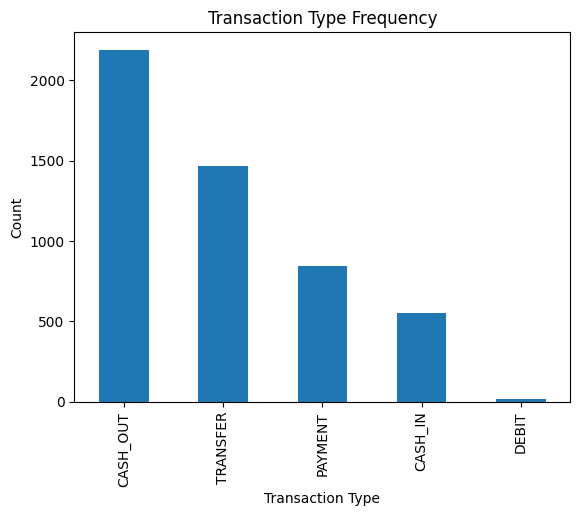

In [26]:
transaction_type_counts = df['type'].value_counts()
transaction_type_counts.plot(kind='bar')
plt.title('Transaction Type Frequency')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [28]:
# Group by 'type' and 'isFraud', then calculate the mean and count
grouped = df.groupby(['type', 'isFraud']).agg({'amount': ['mean', 'count']}).reset_index()
print(grouped)

       type isFraud        amount      
                             mean count
0   CASH_IN     0.0  1.669080e+05   552
1  CASH_OUT     0.0  1.774802e+05   912
2  CASH_OUT     1.0  1.287879e+06  1276
3     DEBIT     0.0  3.661693e+03    18
4   PAYMENT     0.0  1.177322e+04   843
5  TRANSFER     0.0  7.042407e+05   210
6  TRANSFER     1.0  1.309489e+06  1259


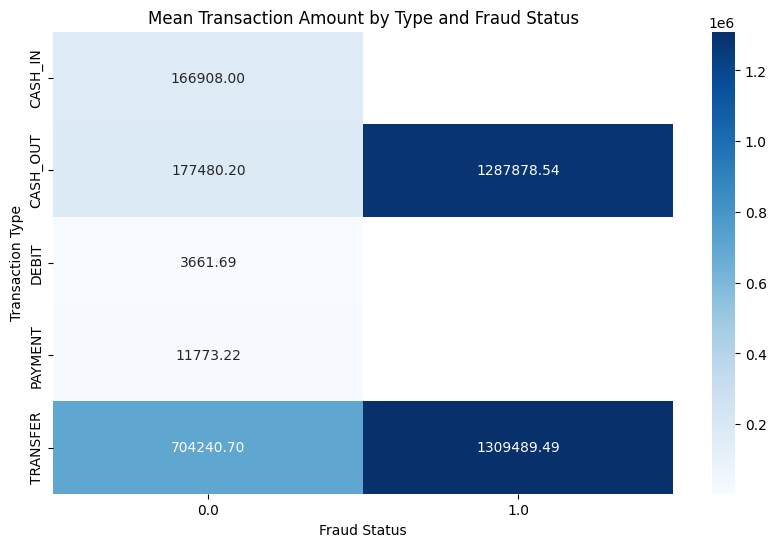

In [30]:
pivot_table = df.pivot_table(values='amount', index='type', columns='isFraud', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='.2f')
plt.title('Mean Transaction Amount by Type and Fraud Status')
plt.ylabel('Transaction Type')
plt.xlabel('Fraud Status')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

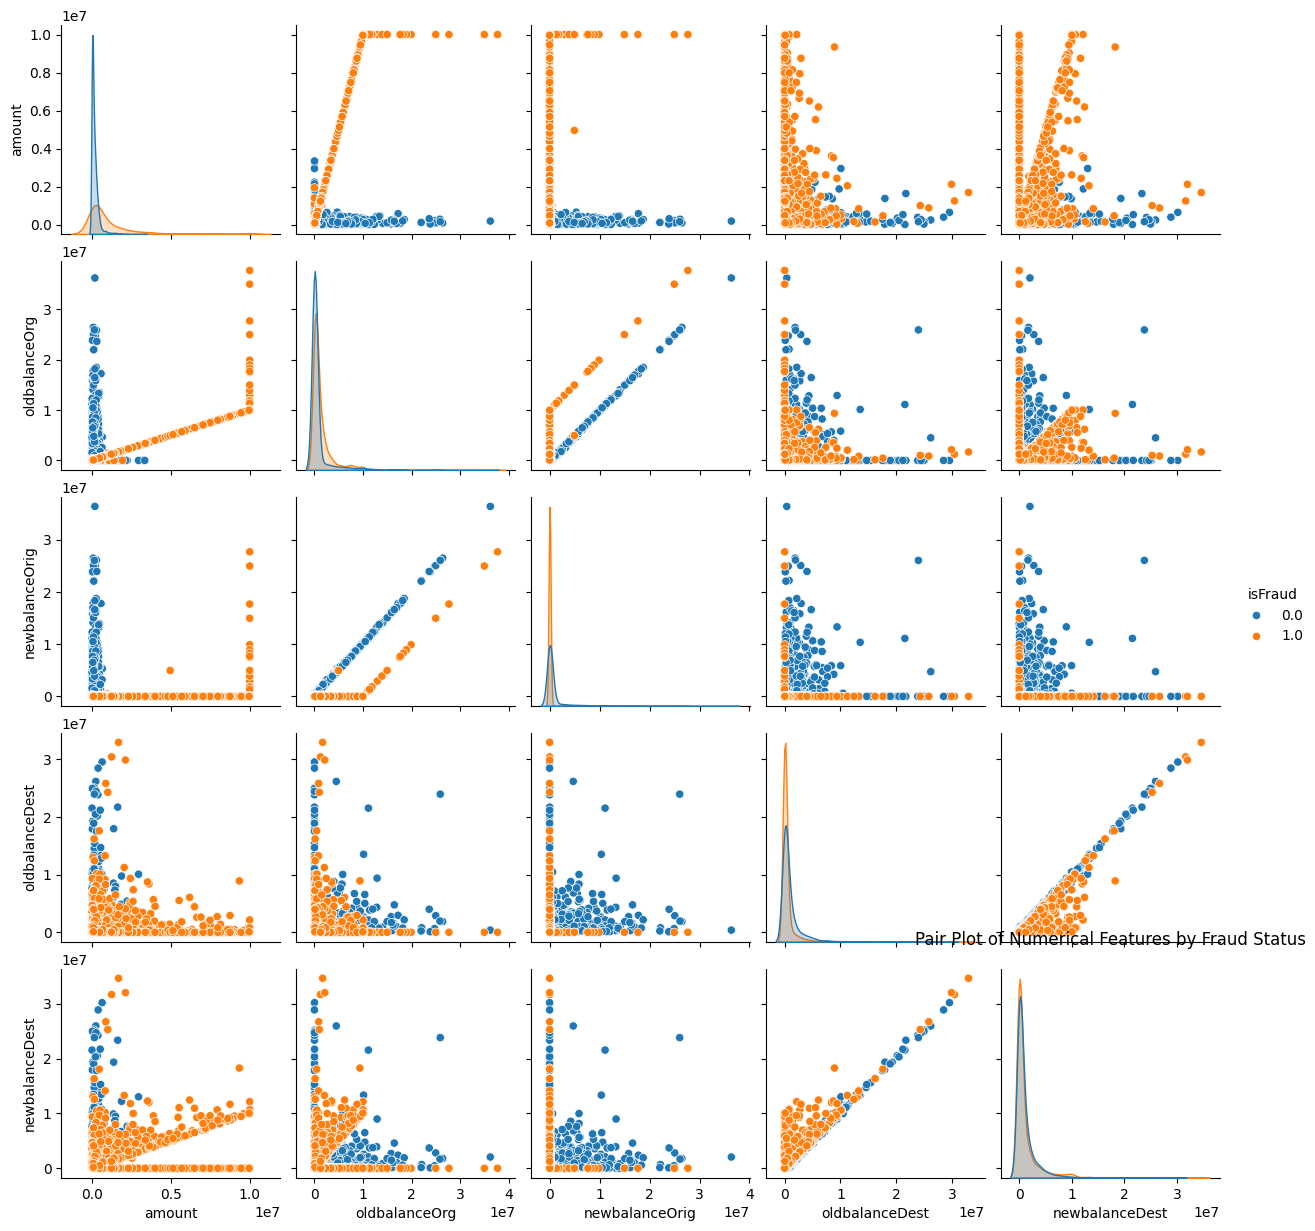

In [32]:
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
sns.pairplot(df[numerical_cols + ['isFraud']], hue='isFraud')
plt.title('Pair Plot of Numerical Features by Fraud Status')
plt.show()

* Fraudulent Transactions Involve Larger Amounts.
* Specific Transaction Types are More Susceptible to Fraud: The analysis of transaction types indicated that "TRANSFER" and "CASH_OUT" were more commonly associated with fraudulent activities.
* High Balance Changes are Indicative of Fraud.
*  the "amount," "newbalanceOrig," and "newbalanceDest" were found to be influential in predicting fraudulent transactions.